## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation = "relu", name = "hidden_layer" + str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation = "relu", name = "hidden_layer" + str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation = "softmax", name = "output")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.1
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.5, 0.15]
nests = [True,False]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for moment in MOMENTUM:
    for nest in nests:
        keras.backend.clear_session()
        print("Experiment with Momentum = %.3f" % (moment))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nest, momentum=moment)
        model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = optimizer)

        model.fit(x_train, y_train,
                 epochs = EPOCHS,
                 batch_size = BATCH_SIZE,
                 validation_data = (x_test, y_test),
                 shuffle = True)

        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "Momentum = " + str(moment) + ", nest = " + str(nest)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with Momentum = 0.950
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [========

50000/50000 [==============================] - 7s 140us/step - loss: 1.4226 - accuracy: 0.5007 - val_loss: 1.6525 - val_accuracy: 0.4275
Epoch 49/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.4192 - accuracy: 0.5019 - val_loss: 1.7545 - val_accuracy: 0.4319
Epoch 50/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4162 - accuracy: 0.5038 - val_loss: 1.7622 - val_accuracy: 0.4102
Experiment with Momentum = 0.950
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

Epoch 46/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.3044 - accuracy: 0.0991 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.3042 - accuracy: 0.0984 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.3046 - accuracy: 0.0989 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.3042 - accuracy: 0.1004 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.3042 - accuracy: 0.0987 - val_loss: 2.3034 - val_accuracy: 0.1000
Experiment with Momentum = 0.500
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_______

50000/50000 [==============================] - 7s 137us/step - loss: 0.8189 - accuracy: 0.7075 - val_loss: 1.6804 - val_accuracy: 0.4911
Epoch 44/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.8236 - accuracy: 0.7056 - val_loss: 1.7437 - val_accuracy: 0.4790
Epoch 45/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.7916 - accuracy: 0.7168 - val_loss: 1.8344 - val_accuracy: 0.4752
Epoch 46/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.7811 - accuracy: 0.7182 - val_loss: 1.9061 - val_accuracy: 0.4715
Epoch 47/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.7670 - accuracy: 0.7233 - val_loss: 1.7362 - val_accuracy: 0.4804
Epoch 48/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.7519 - accuracy: 0.7320 - val_loss: 1.7116 - val_accuracy: 0.5036
Epoch 49/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.7391 - accuracy: 0.7353 - val_loss:

Epoch 41/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.7653 - accuracy: 0.7274 - val_loss: 1.7519 - val_accuracy: 0.4934
Epoch 42/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.7443 - accuracy: 0.7323 - val_loss: 1.6397 - val_accuracy: 0.5098
Epoch 43/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.7309 - accuracy: 0.7368 - val_loss: 1.7661 - val_accuracy: 0.4850
Epoch 44/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.7138 - accuracy: 0.7410 - val_loss: 1.7530 - val_accuracy: 0.5025
Epoch 45/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.6935 - accuracy: 0.7499 - val_loss: 1.7786 - val_accuracy: 0.4937
Epoch 46/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.6857 - accuracy: 0.7534 - val_loss: 1.7465 - val_accuracy: 0.5159
Epoch 47/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.6631 - accuracy: 0.7617

50000/50000 [==============================] - 7s 139us/step - loss: 0.9207 - accuracy: 0.6716 - val_loss: 1.7332 - val_accuracy: 0.4775
Epoch 39/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.8944 - accuracy: 0.6830 - val_loss: 1.5341 - val_accuracy: 0.5007
Epoch 40/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.8848 - accuracy: 0.6823 - val_loss: 1.6240 - val_accuracy: 0.4867
Epoch 41/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.8751 - accuracy: 0.6864 - val_loss: 1.8876 - val_accuracy: 0.4296
Epoch 42/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.8717 - accuracy: 0.6894 - val_loss: 1.6204 - val_accuracy: 0.4836
Epoch 43/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.8320 - accuracy: 0.7035 - val_loss: 2.0349 - val_accuracy: 0.4242
Epoch 44/50
50000/50000 [==============================] - 7s 149us/step - loss: 0.8260 - accuracy: 0.7058 - val_loss:

Epoch 36/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.9112 - accuracy: 0.6759 - val_loss: 1.7115 - val_accuracy: 0.4771
Epoch 37/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.8883 - accuracy: 0.6841 - val_loss: 1.4558 - val_accuracy: 0.5219
Epoch 38/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.8742 - accuracy: 0.6885 - val_loss: 1.5331 - val_accuracy: 0.5034
Epoch 39/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.8611 - accuracy: 0.6947 - val_loss: 1.5816 - val_accuracy: 0.4998
Epoch 40/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.8369 - accuracy: 0.7019 - val_loss: 1.6666 - val_accuracy: 0.4964
Epoch 41/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.8326 - accuracy: 0.7055 - val_loss: 1.6597 - val_accuracy: 0.4793
Epoch 42/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.8068 - accuracy: 0.7125

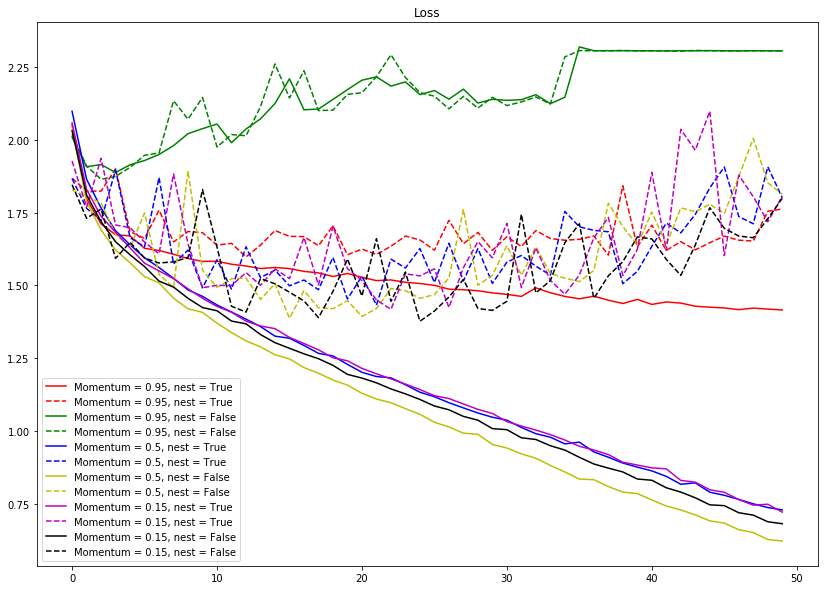

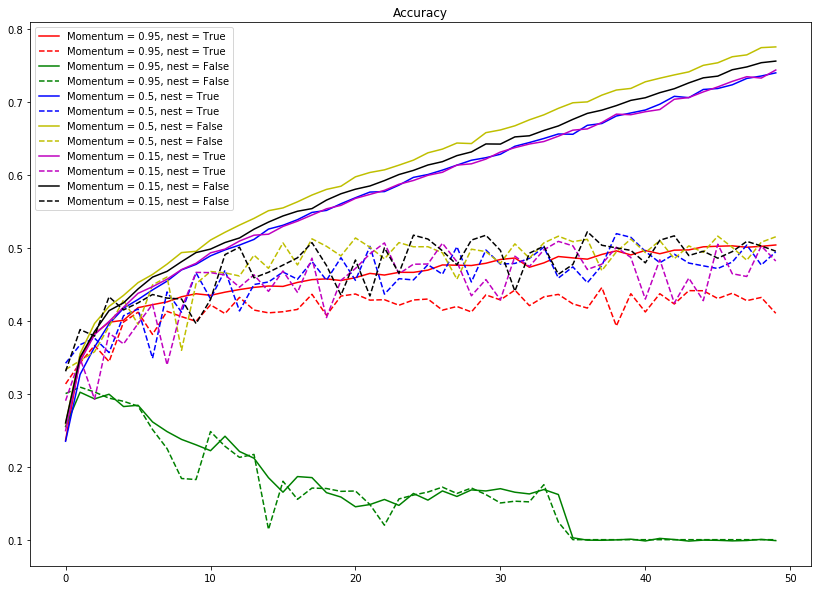

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(14,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(14,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()